In [1]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# データセット群
datasets = [
            make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1),
            make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2),
            make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=2, n_clusters_per_class=1),
            make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=2)
           ]

# 分類器群
names = ['GMM', 'BaysGMM']
classifiers = [
    GaussianMixture(n_components=2, verbose=0, max_iter=1000),
    BayesianGaussianMixture(n_components=2, verbose=0, max_iter=1000)
]

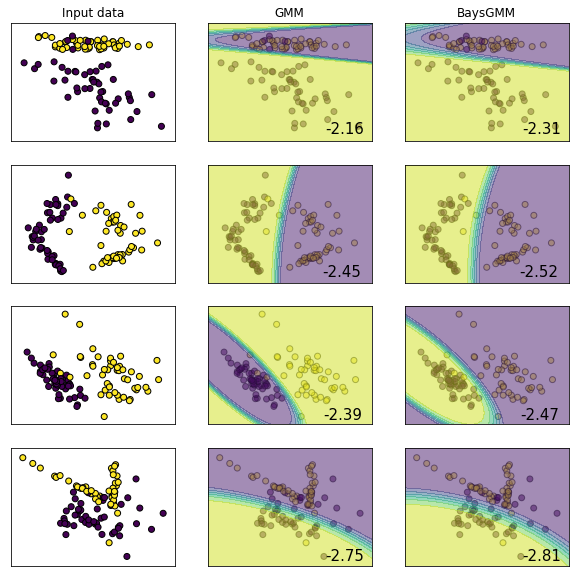

In [3]:
figure = plt.figure(figsize=(10, 10))
i = 1
h = .02

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X)
        score = clf.score(X, y)
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
        y_pred = clf.predict(X)
        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', alpha=0.5)
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=.5)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
        i += 1